# API Data Wrangling with Open-Meteo

In this exercise, we will:

- Fetch historical weather data using the **Open-Meteo API**.
- Parse and clean the data using **pandas**.
- Perform exploratory data analysis.
- Visualize weather trends.

In [1]:
# Install required packages if not already installed
# !pip install requests pandas matplotlib --quiet

In [21]:
# Import Libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Optional: Configure matplotlib for inline display in Jupyter
%matplotlib inline

In [3]:
# Step 1: Set Up Parameters

# Location coordinates for New York City
latitude = 40.7128
longitude = -74.0060

# Date range
start_date = '2023-01-01'
end_date = '2023-01-07'  # One week of data

# Variables to fetch
hourly_variables = ['temperature_2m', 'relativehumidity_2m', 'precipitation']


In [4]:
# Step 2: Make the API Request

base_url = 'https://archive-api.open-meteo.com/v1/archive'

params = {
    'latitude': latitude,
    'longitude': longitude,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'America/New_York'
}

response = requests.get(base_url, params=params)


In [5]:
# Check if the request was successful

if response.status_code == 200:
    print('Data fetched successfully!')
else:
    print(f'Failed to fetch data. Status code: {response.status_code}')


Data fetched successfully!


In [15]:
# Step 3: Load Data into pandas DataFrame

data = response.json()
hourly_data = data['hourly']
df = pd.DataFrame(hourly_data)
df.head()


,time,temperature_2m,relativehumidity_2m,precipitation
0,2023-01-01T00:00,10.5,99,1.0
1,2023-01-01T01:00,10.4,98,0.1
2,2023-01-01T02:00,10.3,96,0.0
3,2023-01-01T03:00,9.7,95,0.0
4,2023-01-01T04:00,9.0,95,0.0


In [16]:
# Step 4: Data Cleaning

# Convert 'time' column to datetime
df['time'] = pd.to_datetime(df['time'])

# Set 'time' as the index
df.set_index('time', inplace=True)

# Check for missing values
df.isnull().sum()


temperature_2m         0
relativehumidity_2m    0
precipitation          0
dtype: int64

In [17]:
# Handle missing values (if any)
df.fillna(method='ffill', inplace=True)  # Forward fill


In [18]:
# Step 5: Exploratory Data Analysis

# Summary Statistics
df.describe()

,temperature_2m,relativehumidity_2m,precipitation
count,168.000000,168.000000,168.000000
mean,8.319048,86.267857,0.136905
std,3.525764,12.804132,0.431063
min,0.400000,45.000000,0.000000
25%,5.875000,81.000000,0.000000
50%,8.200000,90.000000,0.000000
75%,11.100000,97.000000,0.000000
max,17.900000,100.000000,3.100000


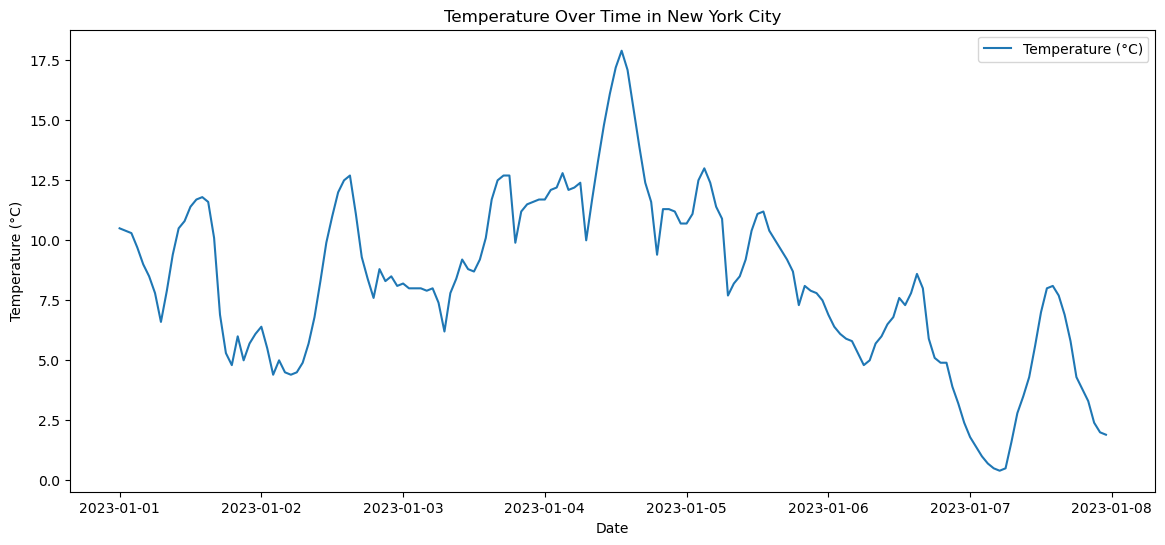

In [22]:
# Plot Temperature Over Time

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['temperature_2m'], label='Temperature (°C)')
plt.title('Temperature Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

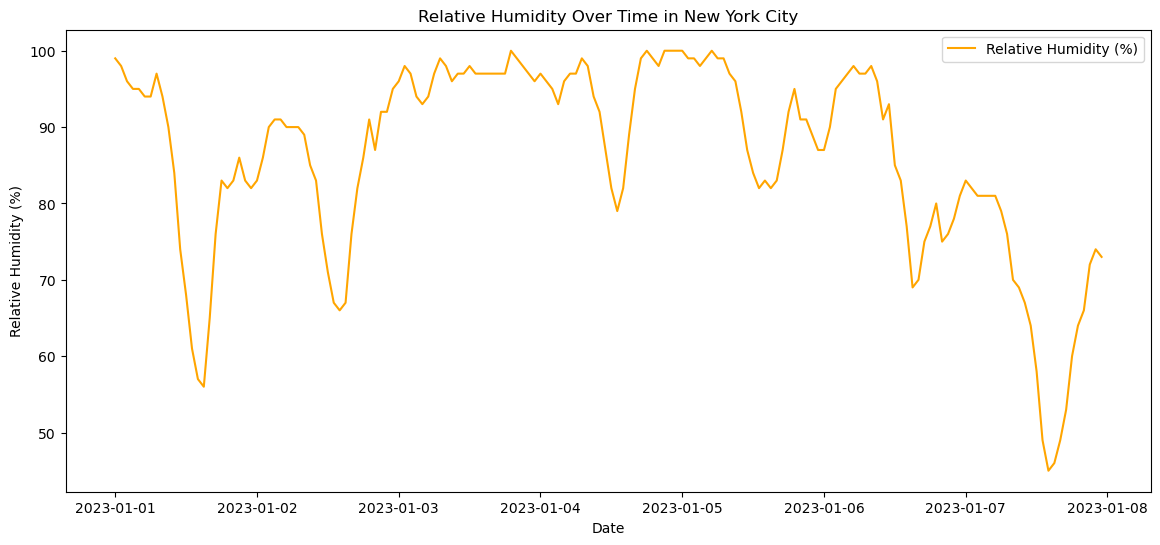

In [23]:
# Plot Relative Humidity Over Time

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['relativehumidity_2m'], color='orange', label='Relative Humidity (%)')
plt.title('Relative Humidity Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Relative Humidity (%)')
plt.legend()
plt.show()


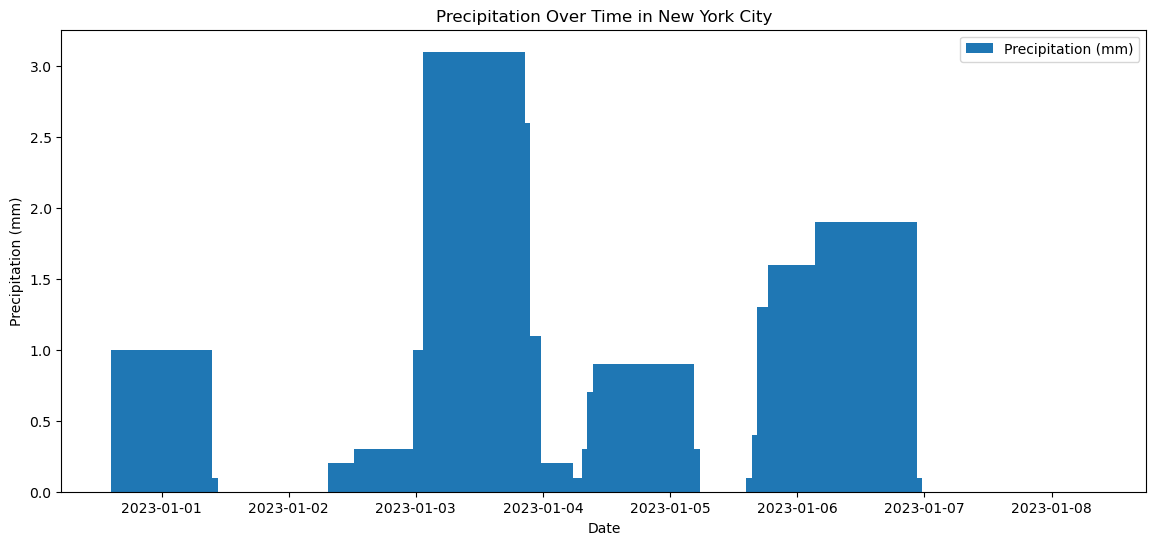

In [24]:
# Plot Precipitation Over Time

plt.figure(figsize=(14, 6))
plt.bar(df.index, df['precipitation'], label='Precipitation (mm)')
plt.title('Precipitation Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.show()


In [25]:
# Step 6: Correlation Analysis

# Calculate correlation between temperature and humidity
correlation = df['temperature_2m'].corr(df['relativehumidity_2m'])
print(f'Correlation between Temperature and Relative Humidity: {correlation:.2f}')


Correlation between Temperature and Relative Humidity: 0.25


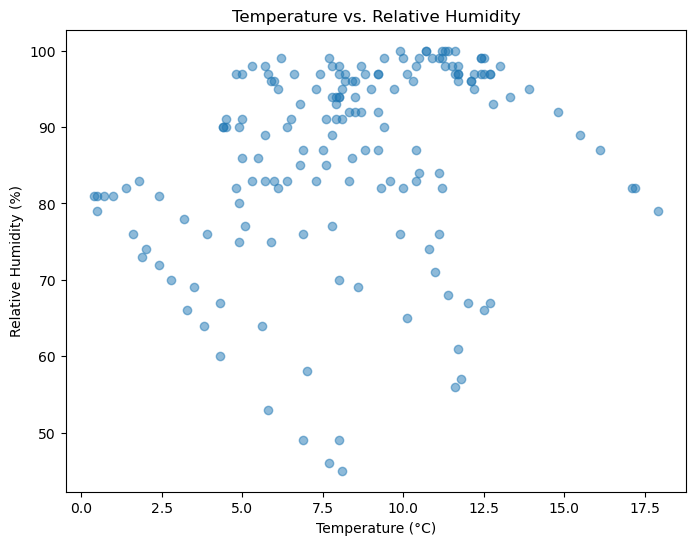

In [26]:
# Scatter Plot of Temperature vs. Relative Humidity

plt.figure(figsize=(8, 6))
plt.scatter(df['temperature_2m'], df['relativehumidity_2m'], alpha=0.5)
plt.title('Temperature vs. Relative Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Relative Humidity (%)')
plt.show()


In [27]:
# Step 7: Resample Data to Daily Averages

daily_avg = df.resample('D').mean()
daily_avg.head()


,temperature_2m,relativehumidity_2m,precipitation
time,,,
2023-01-01,8.658333,83.000000,0.045833
2023-01-02,7.858333,84.000000,0.025000
2023-01-03,9.558333,96.916667,0.391667
2023-01-04,12.954167,94.333333,0.095833
2023-01-05,9.783333,92.125000,0.000000


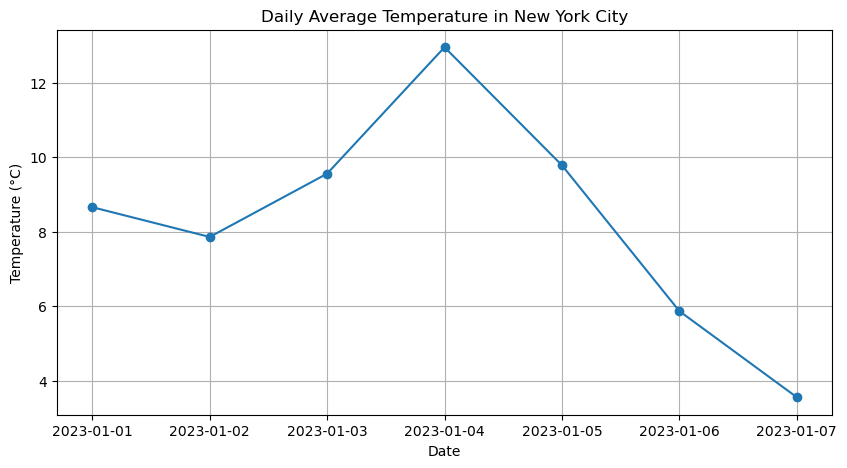

In [28]:
# Plot Daily Average Temperature

plt.figure(figsize=(10, 5))
plt.plot(daily_avg.index, daily_avg['temperature_2m'], marker='o')
plt.title('Daily Average Temperature in New York City')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


In [29]:
# Step 8: Compare with Another Location (Los Angeles)

# Coordinates for Los Angeles
latitude_la = 34.0522
longitude_la = -118.2437

params_la = {
    'latitude': latitude_la,
    'longitude': longitude_la,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'America/Los_Angeles'
}

response_la = requests.get(base_url, params=params_la)

# Load and clean Los Angeles data
data_la = response_la.json()
hourly_data_la = data_la['hourly']
df_la = pd.DataFrame(hourly_data_la)

df_la['time'] = pd.to_datetime(df_la['time'])
df_la.set_index('time', inplace=True)
df_la.fillna(method='ffill', inplace=True)


In [31]:
# Resample Los Angeles Data to Daily Averages

daily_avg_la = df_la.resample('D').mean()
daily_avg_la.head()

,temperature_2m,relativehumidity_2m,precipitation
time,,,
2023-01-01,12.233333,73.666667,0.120833
2023-01-02,9.495833,78.333333,0.079167
2023-01-03,11.970833,83.875000,0.279167
2023-01-04,13.775000,93.250000,0.787500
2023-01-05,11.950000,91.041667,1.258333


In [32]:
# Combine DataFrames for Comparison

combined_temp = pd.DataFrame({
    'New York': daily_avg['temperature_2m'],
    'Los Angeles': daily_avg_la['temperature_2m']
})


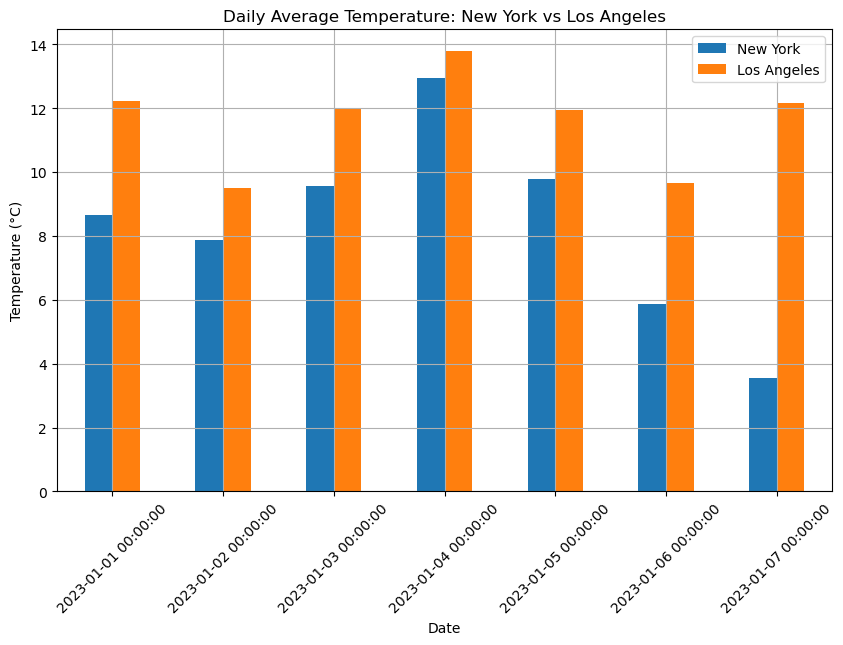

In [33]:
# Plot Comparison of Daily Average Temperature

combined_temp.plot(kind='bar', figsize=(10, 6))
plt.title('Daily Average Temperature: New York vs Los Angeles')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [34]:
# Step 9: Advanced Analysis - Temperature Difference

# Calculate Temperature Difference
combined_temp['Temp Difference'] = combined_temp['Los Angeles'] - combined_temp['New York']
combined_temp


,New York,Los Angeles,Temp Difference
time,,,
2023-01-01,8.658333,12.233333,3.575000
2023-01-02,7.858333,9.495833,1.637500
2023-01-03,9.558333,11.970833,2.412500
2023-01-04,12.954167,13.775000,0.820833
2023-01-05,9.783333,11.950000,2.166667
2023-01-06,5.866667,9.662500,3.795833
2023-01-07,3.554167,12.154167,8.600000


In [35]:
# Step 10: Save Data to CSV (Optional)

# Save New York data
df.to_csv('new_york_weather.csv')

# Save Los Angeles data
df_la.to_csv('los_angeles_weather.csv')


## Conclusion

In this exercise, we:

- Accessed and retrieved data from the **Open-Meteo API**.
- Cleaned and preprocessed JSON data using **pandas**.
- Performed exploratory data analysis and visualization.
- Compared weather patterns between **New York City** and **Los Angeles**.

---

**Next Steps**:

- **Extend the Date Range**: Analyze seasonal trends by fetching data over several months.
- **Fetch Additional Variables**: Include wind speed, atmospheric pressure, or other interesting variables.
- **Forecasting**: Use statistical methods or machine learning models to forecast future weather patterns.
- **Global Analysis**: Compare data from other global cities to gain broader insights.


### Exercise: Compare Rainfall Between London and Seattle

- **Objective**: Compare the total weekly rainfall between London and Seattle over a full year.
- **Tasks**:
  1. **Fetch Data**: Retrieve hourly precipitation data for London and Seattle for the year 2022.
     - **London Coordinates**: Latitude `51.5074`, Longitude `-0.1278`
     - **Seattle Coordinates**: Latitude `47.6062`, Longitude `-122.3321`
  2. **Data Cleaning**: Convert the time columns to datetime objects and set them as the index. Handle any missing values.
  3. **Resample Data**: Resample the hourly data to weekly totals.
  4. **Visualization**: Plot the weekly total precipitation for both cities on the same graph.
  5. **Analysis**: Determine which city had more rainfall overall and identify any interesting patterns.

**Note**: Remember to handle any API limitations, such as data availability or rate limits, and to be mindful of the size of the data you're requesting.

### Tips:

- **API Parameters**: Make sure to adjust the parameters like `latitude`, `longitude`, `start_date`, `end_date`, `hourly`, and `timezone` as needed.
- **Error Handling**: Always check if your API requests are successful before proceeding.
- **Data Storage**: Consider saving your DataFrames to CSV files for future analysis.
- **Visualization**: Customize your plots with titles, labels, legends, and gridlines for better readability.



**My work**



In [68]:
# Step 1: Set Up Parameters

# Location coordinates for London
latitude = 51.5074
longitude = -0.1278

# Date range
start_date = '2022-01-01'
end_date = '2022-12-31'  # One year of data

# Variables to fetch
hourly_variables2 = ['rain', 'precipitation']

In [69]:
# Step 2: Make the API Request

base_url = 'https://archive-api.open-meteo.com/v1/archive'

params_lon = {
    'latitude': latitude,
    'longitude': longitude,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables2),
    'timezone': 'Europe/London'
}

response_lon = requests.get(base_url, params=params_lon)

In [70]:
# Step 2b: Check if the request was successful

if response_lon.status_code == 200:
    print('Data fetched successfully!')
else:
    print(f'Failed to fetch data. Status code: {response_lon.status_code}')

Data fetched successfully!


In [71]:
# Step 3: Load Data into pandas DataFrame

data_lon = response_lon.json()
hourly_data_lon = data_lon['hourly']

df_lon = pd.DataFrame(hourly_data_lon)
df_lon.head()

,time,rain,precipitation
0,2022-01-01T00:00,0.0,0.0
1,2022-01-01T01:00,0.0,0.0
2,2022-01-01T02:00,0.0,0.0
3,2022-01-01T03:00,0.0,0.0
4,2022-01-01T04:00,0.0,0.0


In [72]:
# Step 4: Data Cleaning

# Convert 'time' column to datetime
df_lon['time'] = pd.to_datetime(df_lon['time'])

# Set 'time' as the index
df_lon.set_index('time', inplace=True)

# Check for missing values
df_lon.isnull().sum()

rain             0
precipitation    0
dtype: int64

In [76]:
# Step 4b: Handle missing values (if any)
df_lon.fillna(method='ffill', inplace=True)  # Forward fill
df_lon.head()

,rain,precipitation
time,,
2022-01-01 00:00:00,0.0,0.0
2022-01-01 01:00:00,0.0,0.0
2022-01-01 02:00:00,0.0,0.0
2022-01-01 03:00:00,0.0,0.0
2022-01-01 04:00:00,0.0,0.0


In [74]:
# Step 5: Exploratory Data Analysis

# Summary Statistics
df_lon.describe()

,rain,precipitation
count,8760.000000,8760.000000
mean,0.075525,0.075696
std,0.404424,0.404506
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,14.700000,14.700000


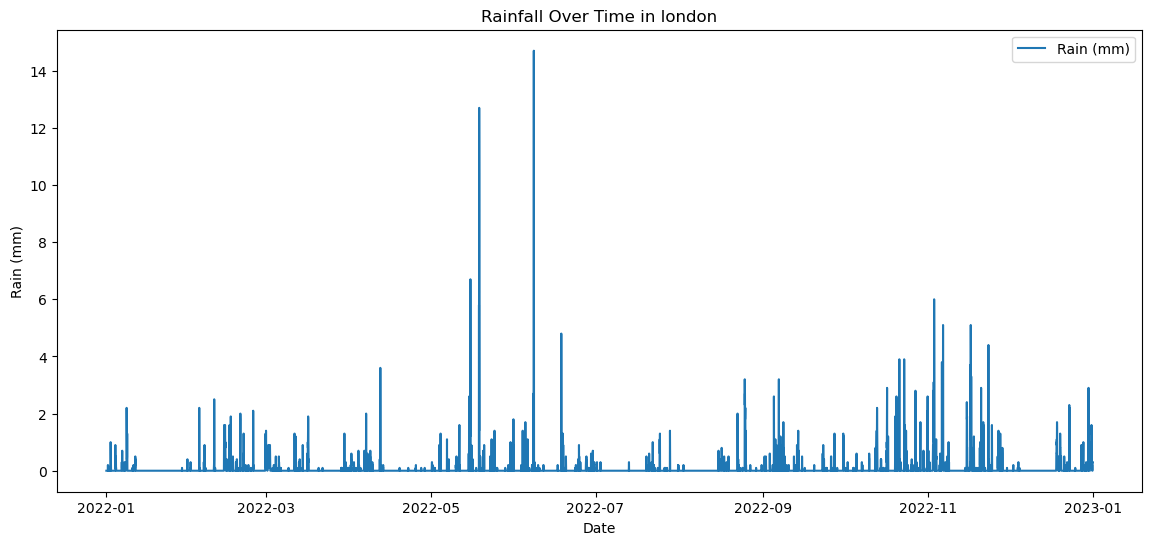

In [75]:
# Plot Rainfall Over Time

plt.figure(figsize=(14, 6))
plt.plot(df_lon.index, df_lon['rain'], label='Rain (mm)')
plt.title('Rainfall Over Time in london')
plt.xlabel('Date')
plt.ylabel('Rain (mm)')
plt.legend()
plt.show()

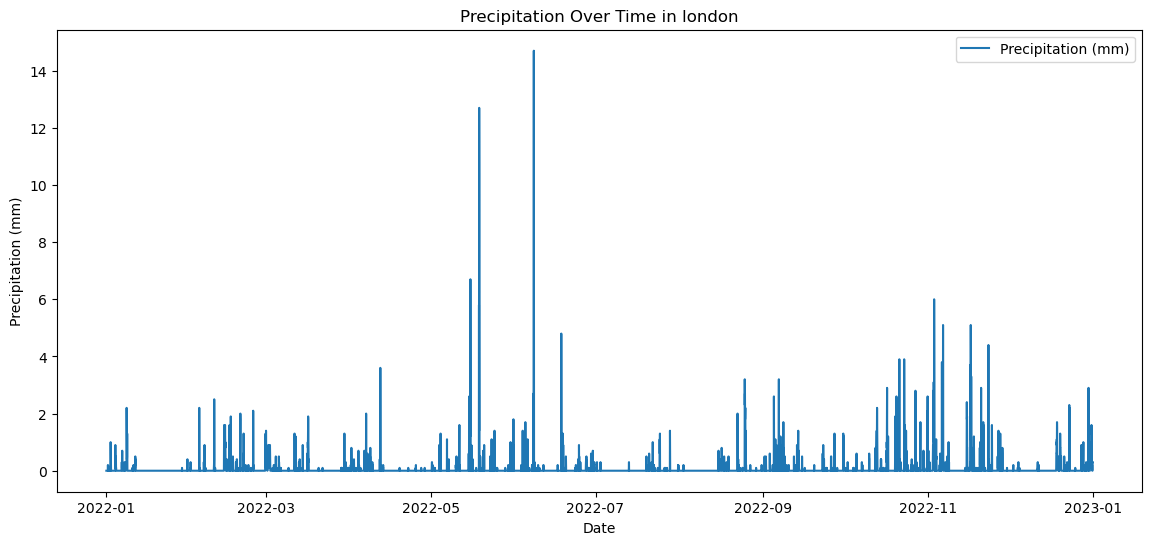

In [77]:
# Plot Precipitation (Total precipitation - rain, showers, snow) Over Time

plt.figure(figsize=(14, 6))
plt.plot(df_lon.index, df_lon['precipitation'], label='Precipitation (mm)')
plt.title('Precipitation Over Time in london')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.show()

In [79]:
# Step 6: Correlation Analysis

# Calculate correlation between temperature and humidity
correlation_lon = df_lon['rain'].corr(df_lon['precipitation'])
print(f'Correlation between Rain and Precipitation (Rain, Showers, Snowfall): {correlation_lon:.2f}')

Correlation between Rain and Precipitation (Rain, Shawers, Snowfall): 1.00


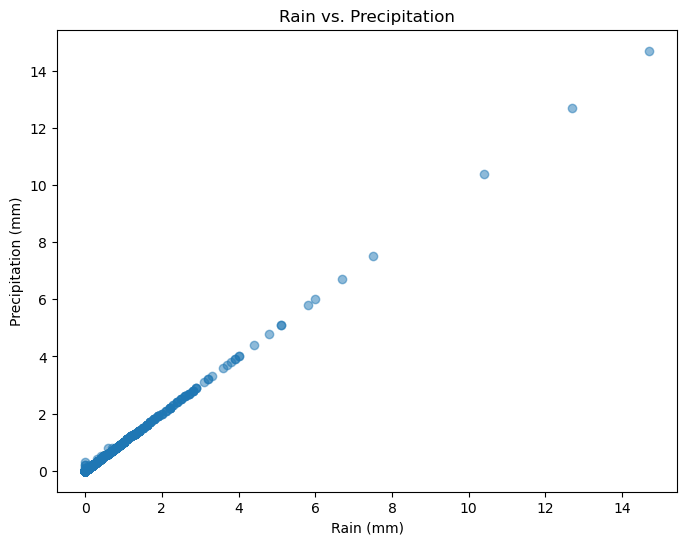

In [80]:
# Scatter Plot of Rain vs. Precipitation

plt.figure(figsize=(8, 6))
plt.scatter(df_lon['rain'], df_lon['precipitation'], alpha=0.5)
plt.title('Rain vs. Precipitation')
plt.xlabel('Rain (mm)')
plt.ylabel('Precipitation (mm)')
plt.show()

In [101]:
# Step 7: Resample Data to Daily Averages

weekly_avg_lon = df_lon.resample('W').mean()
weekly_avg_lon.head()

,rain,precipitation
time,,
2022-01-02,0.045833,0.045833
2022-01-09,0.076786,0.076786
2022-01-16,0.018452,0.018452
2022-01-23,0.000000,0.000000
2022-01-30,0.002381,0.002381


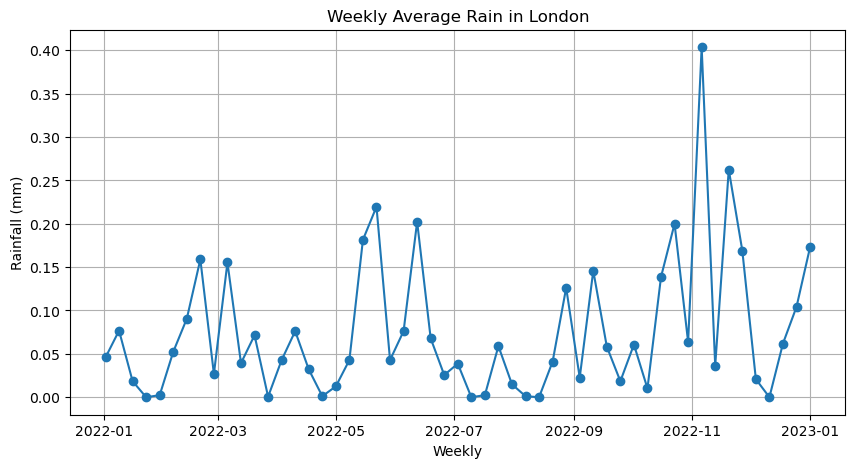

In [102]:
# Plot Weekly Average Temperature

plt.figure(figsize=(10, 5))
plt.plot(weekly_avg_lon.index, weekly_avg_lon['rain'], marker='o')
plt.title('Weekly Average Rain in London')
plt.xlabel('Weekly')
plt.ylabel('Rainfall (mm)')
plt.grid(True)
plt.show()

In [103]:
# Step 8: Compare with Another Location (Seattle)

# Coordinates for Seattle
latitude_sea = 47.6062
longitude_sea = -122.3321

params_sea = {
    'latitude': latitude_sea,
    'longitude': longitude_sea,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables2),
    'timezone': 'America/Los_Angeles'
}

response_sea = requests.get(base_url, params=params_sea)


In [104]:
# Check if the request was successful

if response_sea.status_code == 200:
    print('Data fetched successfully!')
else:
    print(f'Failed to fetch data. Status code: {response_sea.status_code}')

Data fetched successfully!


In [105]:
# Load and clean Seattle data
data_sea = response_sea.json()
hourly_data_sea = data_sea['hourly']
df_sea = pd.DataFrame(hourly_data_sea)

df_sea['time'] = pd.to_datetime(df_sea['time'])
df_sea.set_index('time', inplace=True)
df_sea.fillna(method='ffill', inplace=True)
df_sea.head()

,rain,precipitation
time,,
2022-01-01 00:00:00,0.0,0.0
2022-01-01 01:00:00,0.0,0.0
2022-01-01 02:00:00,0.0,0.0
2022-01-01 03:00:00,0.0,0.0
2022-01-01 04:00:00,0.0,0.0


In [112]:
# Resample Los Angeles Data to Daily Averages
weekly_avg_sea = df_sea.resample('W').mean()

weekly_avg_sea.head()

,rain,precipitation
time,,
2022-01-02,0.208333,0.797917
2022-01-09,0.532738,0.605952
2022-01-16,0.270833,0.270833
2022-01-23,0.093452,0.093452
2022-01-30,0.039286,0.039286


In [114]:
# Combine DataFrames for Comparison

combined_rain = pd.DataFrame({
    'London': weekly_avg_lon['rain'],
    'Seattle': weekly_avg_sea['rain']
})

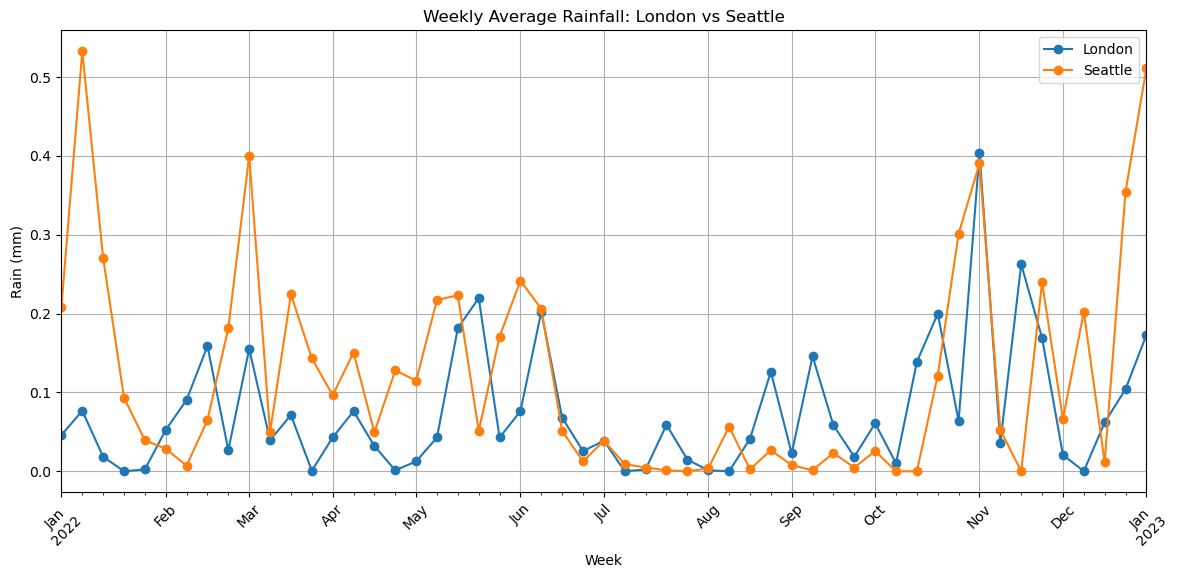

In [121]:
combined_rain.plot(figsize=(14, 6), marker='o')
plt.title('Weekly Average Rainfall: London vs Seattle')
plt.xlabel('Week')
plt.ylabel('Rain (mm)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [125]:
# Step 9: Advanced Analysis - Temperature Difference

# Calculate Temperature Difference
combined_rain['Rain Difference'] = combined_rain['London'] - combined_rain['Seattle']
combined_rain

,London,Seattle,Rain Difference
time,,,
2022-01-02,0.045833,0.208333,-0.162500
2022-01-09,0.076786,0.532738,-0.455952
2022-01-16,0.018452,0.270833,-0.252381
2022-01-23,0.000000,0.093452,-0.093452
2022-01-30,0.002381,0.039286,-0.036905
2022-02-06,0.052381,0.028571,0.023810
2022-02-13,0.090476,0.007143,0.083333
2022-02-20,0.158929,0.064881,0.094048
2022-02-27,0.026786,0.181548,-0.154762


In [126]:
# Step 9: Advanced Analysis - Temperature Difference
combined_rain['Rain Difference'].describe()


count    53.000000
mean     -0.045622
std       0.131770
min      -0.455952
25%      -0.127976
50%      -0.010119
75%       0.023810
max       0.262500
Name: Rain Difference, dtype: float64

In [127]:
more_london = (combined_rain['Rain Difference'] > 0).sum()
more_seattle = (combined_rain['Rain Difference'] < 0).sum()
equal = (combined_rain['Rain Difference'] == 0).sum()


In [128]:
# Step 9b: Advanced Analysis - Weeks that London had more rain than Seattle
more_london 

np.int64(21)

In [129]:
#Step 9c: Advanced Analysis - Weeks that Seattle had more rain than London
more_seattle

np.int64(31)

In [130]:
#Step 9d: Advanced Analysis - Weeks that both Seattle and London had equal amount of rain average
equal

np.int64(1)

In [131]:
# Step 10: Save Data to CSV (Optional)

# Save New York data
df_lon.to_csv('London_weather.csv')

# Save Los Angeles data
df_sea.to_csv('Seattle_weather.csv')

# 🌧️ **Rainfall Comparison Report (London vs Seattle)**

## **Executive Summary**
This report compares weekly rainfall totals between **London** and **Seattle** over a full year using hourly precipitation data aggregated into weekly sums. The objective was to determine which city experienced more rainfall overall and to identify notable seasonal patterns.

Seattle recorded significantly more rainfall than London. Of the 53 weeks analyzed:

- **Seattle had higher rainfall in 31 weeks**
- **London had higher rainfall in 21 weeks**
- **Both cities had equal rainfall in 1 week**

## **Overall Comparison**
Seattle clearly emerged as the wetter city, with consistently higher rainfall across the year—especially during winter and late autumn. London recorded occasional weeks with higher rainfall, but these instances were less frequent and generally smaller in magnitude.

## **Patterns Observed**
- **Seattle’s rainfall peaked in winter and late autumn**, showing strong, consistent precipitation.
- **London’s rainfall was lighter and more evenly distributed**, with only short bursts of higher rainfall.
- **Summer months were relatively dry for both cities**, with minimal differences and very low weekly totals.
- Only **one week** showed equal rainfall, highlighting the overall divergence in precipitation patterns.

## **Conclusion**
Seattle demonstrated a substantially wetter climate overall, while London showed moderate but steady rainfall. The contrasting weekly patterns emphasize the influence of regional climate systems on precipitation behavior in both cities.
